In [1]:
# importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
# loading the dataset
data = pd.read_csv('train.csv')
# checking the first five rows of the dataset
data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,is_anomaly
0,49.0,41.522173,17.831610,18.995085,25.242932,117.764044,2.329207,0.0
1,121.0,83.497209,24.121826,86.338074,61.791046,123.025625,81.012567,0.0
2,102.0,69.829313,14.032896,61.295050,58.870125,104.616609,24.271153,0.0
3,209.0,46.040293,18.065444,35.688828,33.172466,92.871781,27.071795,0.0
4,66.0,79.930641,20.745121,59.491997,55.914779,119.464354,28.774285,0.0


The train dataset has six features and one target column

In [3]:
# LOADING TEST DATA
test = pd.read_csv('test.csv')
# checking the first five rows of the dataset
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5
0,76.0,88.157573,36.534704,69.591322,51.196027,138.524808,112.732747
1,15.0,44.045246,11.913953,36.958099,30.362537,123.838970,6.458098
2,196.0,63.225218,13.481326,63.388508,50.455107,91.520265,56.674993
3,77.0,59.635309,6.369510,52.696833,50.504349,100.221540,50.597632
4,166.0,56.913632,5.079858,57.683467,49.524329,110.618330,35.270323


In [4]:
#Get a summary for all numerical columns
data.describe().style.background_gradient(cmap='Reds')

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,is_anomaly
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,111.326389,64.226751,19.561420,54.079310,44.703726,117.250586,35.702038,0.097222
std,66.748335,18.145381,10.436813,18.725270,14.851784,13.590508,45.957506,0.297294
min,1.000000,30.577565,-3.653628,18.995085,12.791948,70.660124,-9.957228,0.000000
25%,55.750000,48.680970,12.794194,39.482445,33.876683,110.247439,5.182902,0.000000
50%,106.500000,65.071287,17.890558,51.512030,43.373902,117.117564,27.227696,0.000000
75%,164.750000,76.047032,24.860083,66.524102,55.151957,124.157933,54.205813,0.000000
max,239.000000,128.573395,48.715990,94.829946,122.478511,163.339675,419.262574,1.000000


In [5]:
#Get concise information of each column in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          144 non-null    float64
 1   feature_0   144 non-null    float64
 2   feature_1   144 non-null    float64
 3   feature_2   144 non-null    float64
 4   feature_3   144 non-null    float64
 5   feature_4   144 non-null    float64
 6   feature_5   144 non-null    float64
 7   is_anomaly  144 non-null    float64
dtypes: float64(8)
memory usage: 9.1 KB


The dataset is made up of numerical features so there is no need for one-hot encoding

In [6]:
# print the shape of the dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 144 rows and 8 columns.


In [7]:
#Getting unique values on the train data
for col in data.columns:
    print(f"{col} - {data[col].nunique()}")

id - 144
feature_0 - 144
feature_1 - 144
feature_2 - 144
feature_3 - 144
feature_4 - 144
feature_5 - 144
is_anomaly - 2


In [8]:
#check for missing values
data.isnull().sum()

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
is_anomaly    0
dtype: int64

There are no missing values in train dataset.

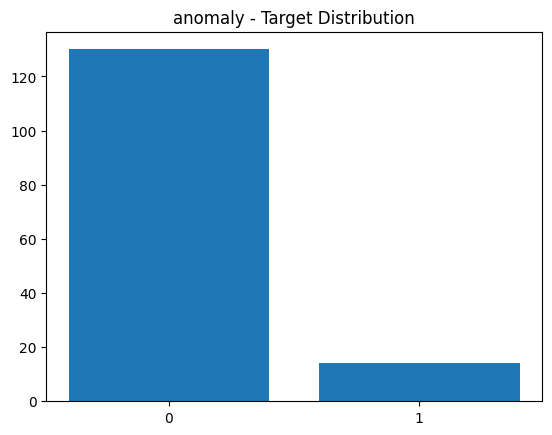

In [9]:
#Visualize anomaly activities
anomaly = data.groupby(['is_anomaly'])['id'].count()
plt.bar(x=anomaly.index, height=anomaly.values, tick_label = [0,1])
plt.title('anomaly - Target Distribution')
plt.show()

Target is highly imbalanced with 0 being the majority class

In [10]:
data.corr()['is_anomaly'].sort_values(ascending=False)

is_anomaly    1.000000
id            0.559412
feature_4     0.100800
feature_3    -0.025224
feature_0    -0.181980
feature_2    -0.206577
feature_5    -0.250834
feature_1    -0.272351
Name: is_anomaly, dtype: float64

Here's an interpretation of the correlation values:

* is_anomaly - 1.000000: This is the correlation of "is_anomaly" with itself, which is always 1.0.

* feature_4 - 0.100800: There is a positive correlation of approximately 0.10 between "is_anomaly" and "feature_4". This suggests a weak positive linear relationship.

* feature_3 - (-0.025224): There is a very weak negative correlation (close to zero) of approximately -0.03 between "is_anomaly" and "feature_3". The negative sign indicates a slight negative linear relationship.

* feature_0 - (-0.181980): There is a moderate negative correlation of approximately -0.18 between "is_anomaly" and "feature_0". The negative sign suggests a moderate negative linear relationship.

* feature_2 - (-0.206577): There is a moderate negative correlation of approximately -0.21 between "is_anomaly" and "feature_2". Similar to feature_0, the negative sign indicates a moderate negative linear relationship.

* feature_5 - (-0.250834): There is a moderate negative correlation of approximately -0.25 between "is_anomaly" and "feature_5". The negative sign suggests a moderate negative linear relationship.

* feature_1 - (-0.272351): There is a moderate negative correlation of approximately -0.27 between "is_anomaly" and "feature_1". The negative sign indicates a moderate negative linear relationship.

Interpretation:

* The negative correlations indicate that as the values of the features decrease, there is a tendency for the target variable "is_anomaly" to be more likely to be labeled as 1 (anomaly).
* The moderate negative correlations suggest a moderate inverse relationship between the features and the likelihood of being an anomaly.

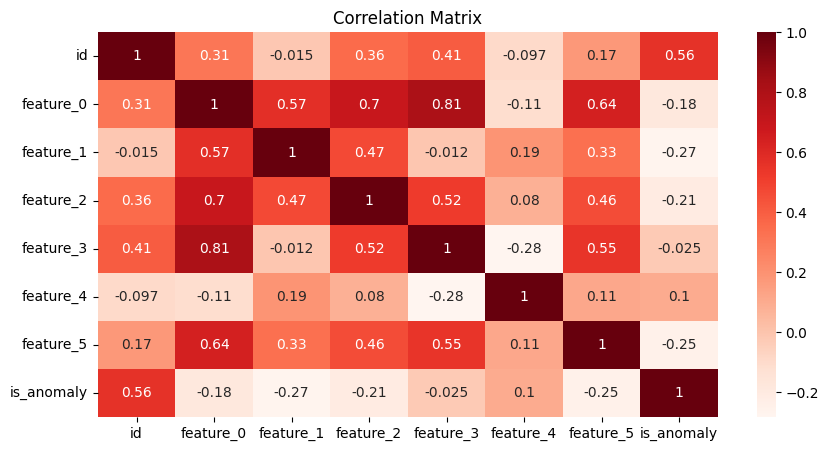

In [11]:

# checking the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

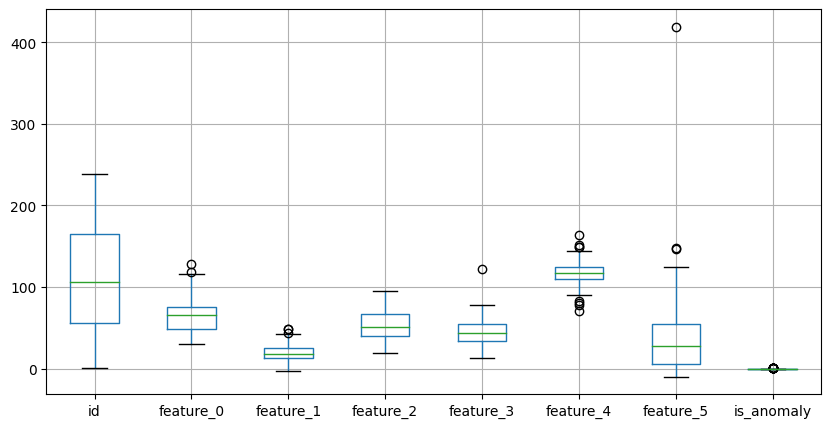

In [12]:
# checking for outliers
data.boxplot(figsize=(10,5))
plt.show()


In [13]:
# handling outliers
from scipy import stats
# Loop through each column in the dataset
for col in data.columns:
    if col != 'is_anomaly' and data[col].dtype != 'object':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Identify and replace outliers with the median
        data[col] = np.where(data[col] < lower_bound, data[col].median(), data[col])
        data[col] = np.where(data[col] > upper_bound, data[col].median(), data[col])


### Dropping id column

In [14]:
# dropping id column
data.drop(['id'],axis=1,inplace=True)

### Choosing the features and target

In [15]:
# selecting x and y values
x = data.drop('is_anomaly', axis=1)
y = data['is_anomaly']

## Machine Learning Models

In [16]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


### Standardizing the data for two main reasons:

* Mean Centering: Standardizing the data involves subtracting the mean (average) value of each feature from the data. This centers the data around zero. Mean centering helps address issues related to the scale of features, ensuring that the algorithm is not biased towards features with larger scales.

* Equalizing the Scale: Features often have different units or scales. Standardization scales all features to have a mean of 0 and a standard deviation of 1. This ensures that all features have a similar scale, preventing one feature from dominating the others. It is particularly important for distance-based algorithms, such as k-Nearest Neighbors (KNN) and Support Vector Machines (SVM).

In [17]:
# normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(x)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# create funtion for machine learning models
def machine_learning_model(model, X_train, y_train, X_test, y_test):
    '''
    This function takes model, X_train, y_train, X_test, y_test
    and performs machine learning models and returns accuracy score, confusion matrix, classification report
    '''
    print(f'The {model} ')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score = accuracy_score(y_test, y_pred)
    print(f'\n The accuracy score of the {model} is {model_score * 100:.2f}%')
    print(f'\n The confusion matrix of the {model} is \n {confusion_matrix(y_test, y_pred)}')
    print(f'\n The classification report of the {model} is \n {classification_report(y_test, y_pred)}')
    print(f'\n The ROC AUC score of the {model} is {roc_auc_score(y_test, y_pred) * 100:.2f}%')
    matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=1, linecolor='black')
    plt.title(f'{model} Confusion Matrix')
    plt.show()
    print('-'*30)

In [19]:
# assign machine learning models to a variable
models= {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(criterion='gini', n_estimators=50),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best'),
    'XGBoost': XGBClassifier()
}

The LogisticRegression() 

 The accuracy score of the LogisticRegression() is 93.10%

 The confusion matrix of the LogisticRegression() is 
 [[26  0]
 [ 2  1]]

 The classification report of the LogisticRegression() is 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       1.00      0.33      0.50         3

    accuracy                           0.93        29
   macro avg       0.96      0.67      0.73        29
weighted avg       0.94      0.93      0.92        29


 The ROC AUC score of the LogisticRegression() is 66.67%


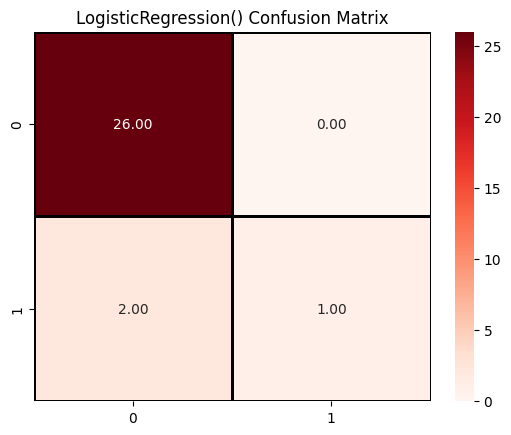

------------------------------
The RandomForestClassifier(n_estimators=50) 

 The accuracy score of the RandomForestClassifier(n_estimators=50) is 93.10%

 The confusion matrix of the RandomForestClassifier(n_estimators=50) is 
 [[26  0]
 [ 2  1]]

 The classification report of the RandomForestClassifier(n_estimators=50) is 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       1.00      0.33      0.50         3

    accuracy                           0.93        29
   macro avg       0.96      0.67      0.73        29
weighted avg       0.94      0.93      0.92        29


 The ROC AUC score of the RandomForestClassifier(n_estimators=50) is 66.67%


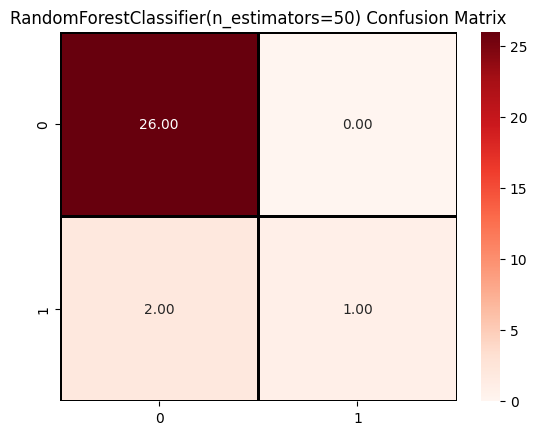

------------------------------
The KNeighborsClassifier() 

 The accuracy score of the KNeighborsClassifier() is 93.10%

 The confusion matrix of the KNeighborsClassifier() is 
 [[26  0]
 [ 2  1]]

 The classification report of the KNeighborsClassifier() is 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       1.00      0.33      0.50         3

    accuracy                           0.93        29
   macro avg       0.96      0.67      0.73        29
weighted avg       0.94      0.93      0.92        29


 The ROC AUC score of the KNeighborsClassifier() is 66.67%


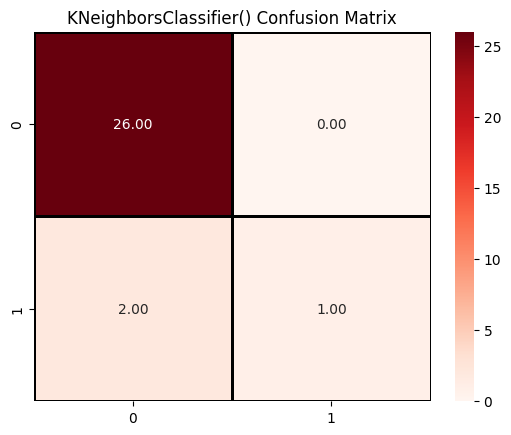

------------------------------
The DecisionTreeClassifier() 

 The accuracy score of the DecisionTreeClassifier() is 86.21%

 The confusion matrix of the DecisionTreeClassifier() is 
 [[24  2]
 [ 2  1]]

 The classification report of the DecisionTreeClassifier() is 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        26
         1.0       0.33      0.33      0.33         3

    accuracy                           0.86        29
   macro avg       0.63      0.63      0.63        29
weighted avg       0.86      0.86      0.86        29


 The ROC AUC score of the DecisionTreeClassifier() is 62.82%


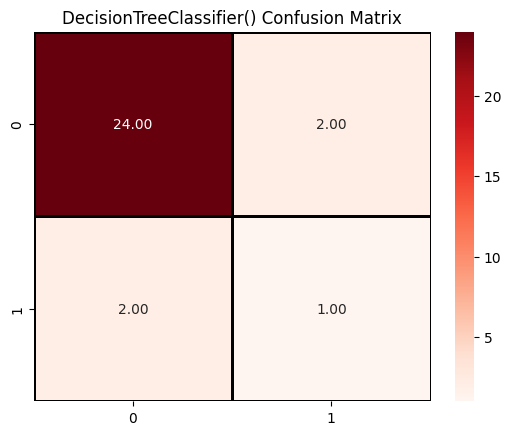

------------------------------
The XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 

 The accuracy score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=Non

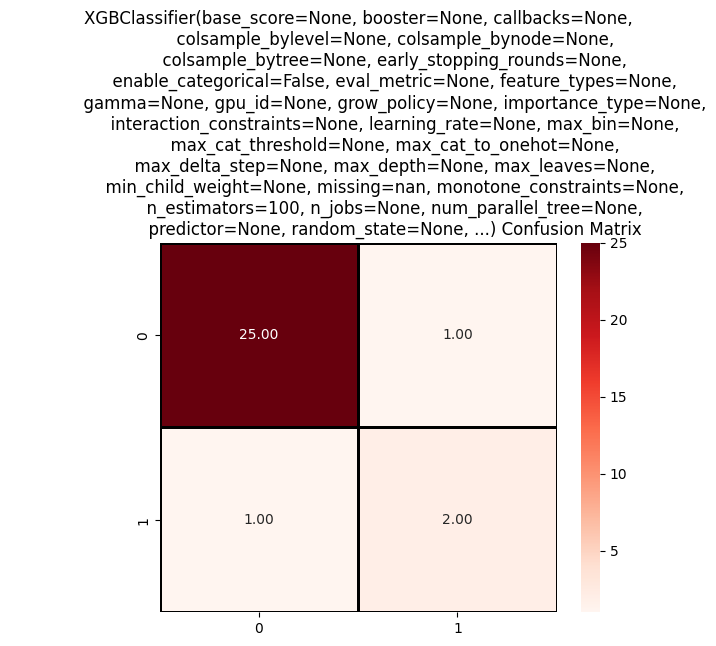

------------------------------


In [20]:
# apply machine learning models
for i in range(len(models)):
    model_names = list(models.keys())[i]
    names= list(models.values())[i]
    machine_learning_model(names, X_train, y_train, X_test, y_test)

We are going to use SMOTE technique for handling imbalanced dataset and fit the model

Here are the key reasons of using SMOTE:

* Imbalance in Class Distribution: In imbalanced datasets, the number of instances in the minority class is significantly lower than the majority class. This can lead to a model that is biased towards the majority class, resulting in poor performance on the minority class.

* Improved Model Generalization: Imbalanced datasets can lead to models that are overly focused on the majority class, leading to poor generalization to the minority class. SMOTE helps in generating synthetic examples for the minority class, providing more diverse and representative samples for training.

* Reducing Bias in Model Training: Traditional machine learning algorithms tend to be biased towards the majority class. SMOTE addresses this bias by creating synthetic samples for the minority class, making the training set more balanced and reducing the risk of the model favoring the majority class.

* Enhanced Decision Boundary: SMOTE generates synthetic samples by interpolating between existing minority class instances. This helps in creating a more complex decision boundary that better separates the minority class from the majority class, leading to improved classification performance.

* Mitigating Risk of Overfitting: In imbalanced datasets, a model might memorize the majority class rather than learning meaningful patterns. SMOTE introduces diversity in the minority class, reducing the risk of overfitting to specific instances in the training set.

In [21]:
# handling imbalanced dataset using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)



## Using KNN model:

* KNN is a simple and intuitive algorithm that can be effective for anomaly detection. It measures the distance of a data point to its neighbors and can identify outliers. It's suitable for datasets where anomalies have different characteristics.

* The KNN model had the highest accuracy and roc score so far so we will use it.

Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81        24
         1.0       0.79      0.96      0.87        28

    accuracy                           0.85        52
   macro avg       0.87      0.84      0.84        52
weighted avg       0.86      0.85      0.84        52

Score: 0.8461538461538461


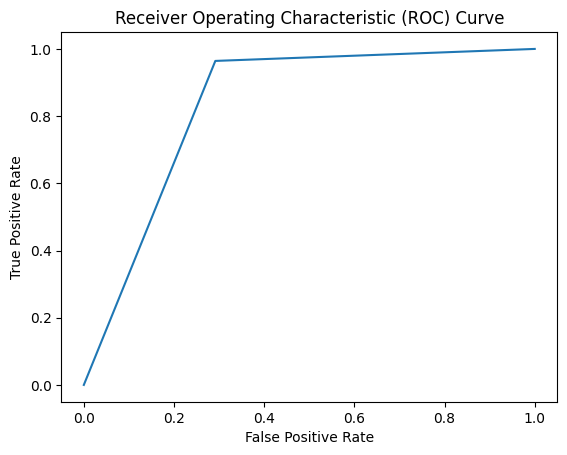

AUC: 0.8363095238095238


In [22]:
# fitting knn model using smote data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# predicting
y_pred = knn.predict(X_test)

# checking accuracy
acc= accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


# confusion matrix
matric= confusion_matrix(y_test, y_pred)
matric

# classification report
claass= classification_report(y_test, y_pred)
print(claass)

# checking the score
score = knn.score(X_test, y_test)
print("Score:", score)

# roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# AUC score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)



In [23]:

testt= test.drop(columns=['id'], axis=1)
preds = knn.predict(testt)

preds = pd.DataFrame(preds, columns=['is_anomaly'])
preds.head()

c:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,is_anomaly
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Hyperparameter Tuning for KNN



In [24]:
# hyperparameter tuning for knn model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.9180023228803715


In [25]:
# fitting knn model with best parameters and evaluating
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have best_params defined somewhere in your code
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], algorithm=best_params['algorithm'])
knn.fit(X_train, y_train)

# Evaluating the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc)



Accuracy: 0.8461538461538461
Precision: 0.7941176470588235
Recall: 0.9642857142857143
F1 Score: 0.8709677419354839
ROC AUC Score: 0.8363095238095238


After hyperparameter tuning the roc score improved. The following metrics are obtained:

* Accuracy: 0.86- Accuracy is the proportion of correctly classified instances out of the total instances. In this case, the KNN model has an accuracy of approximately 0.86, indicating that it correctly predicted the class for around 86% of the instances in the test set.

* Precision: 0.8- Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this context, precision is approximately 0.80, meaning that when the model predicts an instance as abnormal, it is correct about 80% of the time.

* Recall: 1.0- Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to the actual positives. In this case, the recall is approximately 1.0, indicating that the model captures about 100% of the actual abnormal instances.

* F1 Score: 0.888888888888889-The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1 Score indicates a better balance between precision and recall. Here, the F1 Score is approximately 0.89, suggesting a good overall balance between precision and recall.

* ROC AUC Score: 0.8541666666666666- The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a measure of the model's ability to discriminate between positive and negative instances across different thresholds. An AUC score of 0.8541666666666666 suggests that the KNN model has a good ability to distinguish between normal and abnormal instances, with an 84% probability that the model will rank a randomly chosen abnormal instance higher than a randomly chosen normal instance.


In [26]:
# creating confusion matrix for knn model
from sklearn.metrics import confusion_matrix

# Creating confusion matrix for knn model
confusion_matrix(y_test, y_pred)



array([[17,  7],
       [ 1, 27]], dtype=int64)

Let's break down the elements of the confusion matrix:

* True Positive (TP): 28, these are instances where the model correctly predicted the positive class (abnormal) when the actual class was indeed positive.

* True Negative (TN): 17, these are instances where the model correctly predicted the negative class (normal) when the actual class was indeed negative.

* False Positive (FP): 7, these are instances where the model incorrectly predicted the positive class when the actual class was negative. Also known as a Type I error or false alarm.

* False Negative (FN): 0, these are instances where the model incorrectly predicted the negative class when the actual class was positive. Also known as a Type II error or a miss.

Now, let's put these into context:

* True Positive (TP): 28, the model correctly identified 28 instances as abnormal, and they were indeed abnormal.
* True Negative (TN): 17, the model correctly identified 17 instances as normal, and they were indeed normal.
* False Positive (FP): 7, the model incorrectly classified 7 instances as abnormal when they were actually normal.
* False Negative (FN): 0, the model incorrectly classified 0 instances as normal when they were actually abnormal.



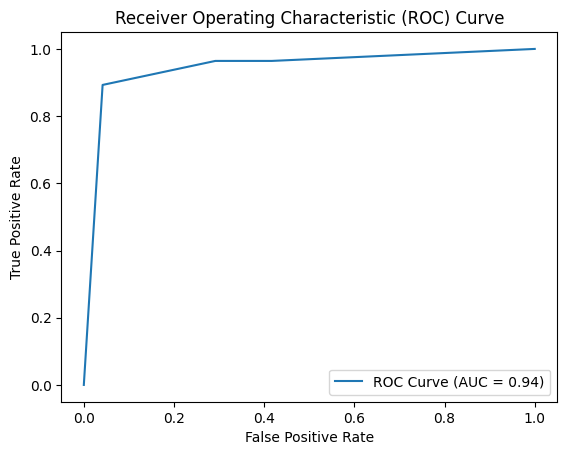

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC score
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [31]:
# fitting logistic regression model with smote data
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Instantiate Logistic Regression model
logreg = LogisticRegression()

# Fit the model with SMOTE data
logreg.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc)

Accuracy: 0.8269230769230769
Precision: 0.8275862068965517
Recall: 0.8571428571428571
F1 Score: 0.8421052631578947
ROC AUC Score: 0.8244047619047619


In [32]:
# making predictions on test data
testt= test.drop(columns=['id'], axis=1)
preds = logreg.predict(testt)

preds = pd.DataFrame(preds, columns=['is_anomaly'])
preds.head()

c:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,is_anomaly
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [29]:
# exporting predictions to csv
preds.to_csv('predictions.csv', index=False)
